# Proyecto Semestral

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4895752%2F391fac1718d81b6c7cf0b53eb231d562%2Finbox_4895752_5e4735cb769c6be5f5872a052d0007e2_841520521_preview_20170113163124_2.jpg?generation=1597574096430659&alt=media)

## Integrantes
* Felipe Miranda Rebolledo
* 

## Entrega 1

### Importación de Librerías

In [2]:
# Importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

### Carga y visualización de Data

In [5]:
# Cargamos la data
data_frame = pd.read_csv("docs/demo_round_traces.csv", sep=";") # Cargamos el archivo csv
data_frame.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

## Pregunta 1:
**¿Cuál es el mapa con mayor cantidad de tiros a la cabeza y de qué equipo fue?**

In [10]:
# Seleccionar columnas a utilizar
column_select = data_frame[["Map", "Team", "InternalTeamId", "MatchHeadshots"]]
column_select

,Map,Team,InternalTeamId,MatchHeadshots
0,de_inferno,Terrorist,1,0
1,de_inferno,Terrorist,1,0
2,de_inferno,Terrorist,1,0
3,de_inferno,Terrorist,1,0
4,de_inferno,Terrorist,1,0
...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,2
79153,de_mirage,CounterTerrorist,2,3
79154,de_mirage,CounterTerrorist,2,3
79155,de_mirage,CounterTerrorist,2,0


In [20]:
# Obtenemos el promedio de headshots por mapa
headshots_mean = column_select.groupby("Map")["MatchHeadshots"].mean()
# Ver dos decimales
headshots_mean = headshots_mean.round(2)
headshots_mean

Map
de_dust2      3.89
de_inferno    3.96
de_mirage     3.63
de_nuke       3.94
Name: MatchHeadshots, dtype: float64

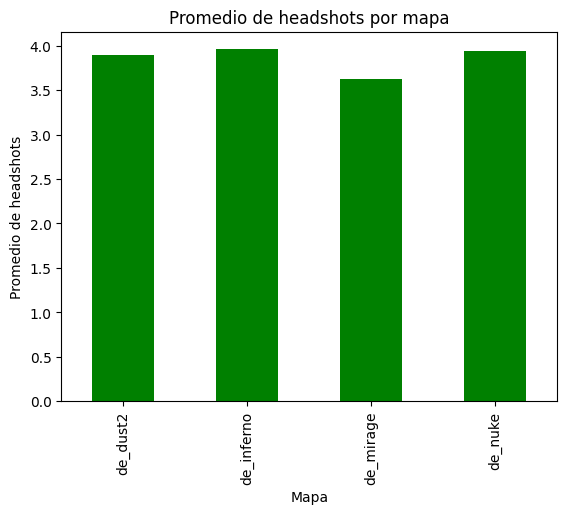

In [22]:
# Graficamos el promedio de headshots por mapa
headshots_mean.plot(kind="bar", color="green")
plt.title("Promedio de headshots por mapa")
plt.ylabel("Promedio de headshots")
plt.xlabel("Mapa")
plt.show()

Podemos notar que el mapa donde más tiros a la cabeza se realizan es en **"de_inferno"**

In [21]:
# Saber que equipo da mas headshots en el mapa de inferno
inferno = column_select[column_select["Map"] == "de_inferno"]
inferno = inferno.groupby("Team")["MatchHeadshots"].mean()
inferno = inferno.round(2)
inferno

Team
CounterTerrorist    4.04
Terrorist           3.87
Name: MatchHeadshots, dtype: float64

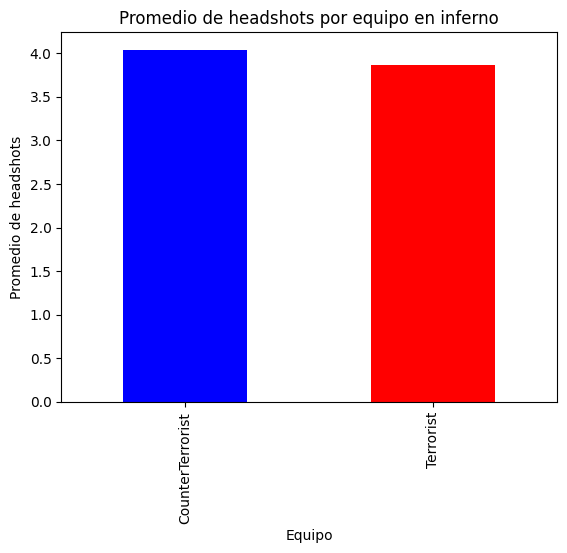

In [24]:
# Graficamos el promedio de headshots por equipo en el mapa de inferno
set_color = ["blue", "red"]
inferno.plot(kind="bar", color=set_color)
plt.title("Promedio de headshots por equipo en inferno")
plt.ylabel("Promedio de headshots")
plt.xlabel("Equipo")
plt.show()

**Respuesta:** Podemos ver que el mapa en el que más Headshots se realizan es en el **"de_inferno"** y el equipo quien los realiza es el **"CounterTerrorist"**